In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

We have already maked the mood classification model, now there comes the second part , where we have to made the mood based recommendation system, now this dataset have  100000 movies and Tv series , we dont need such a huge ampunt of movies, because e are making a movie recommendation system , where I will show top 10 movies according to refresh the mood of the user. We have to select the best movies/Tv_shows from the daatset , proper data analysis is required for that. Lets do it.

In [2]:
df1=pd.read_csv("contentDataGenre.csv")
df2=pd.read_csv("contentDataPrime.csv")
df3=pd.read_csv("contentDataRegion.csv")

In [27]:
df1.head(1)# genres dataset

,dataId,genre
0,102795,Drama


In [4]:
df_dup1 = df1.duplicated('dataId', keep = False)
df_dup1.value_counts()

True     191655
False     27558
dtype: int64

In [5]:
# Delete duplicates from dataset 1
df1 = df1.drop_duplicates(subset='dataId')

In [6]:
(df1["genre"].value_counts()).shape # total no of genres

(28,)

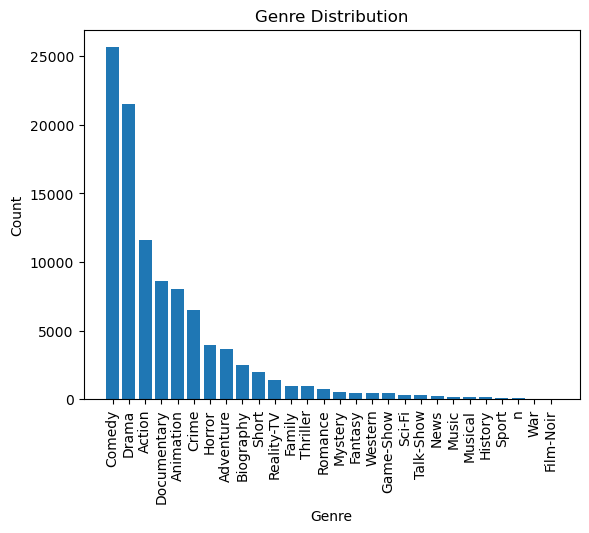

In [7]:
import matplotlib.pyplot as plt
genre_counts = df1["genre"].value_counts()
plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.title("Genre Distribution")
plt.show()

**Data Analysis:**
From this graph we can say that top 5 genres are Drama, Comedy, Romance, Action, Crime. But it includes both movies and Tv shows. So we should do individual plots for the Tv shows and movies which we will do in the df2 dataset.

In [8]:
df2.head(1)

,dataId,contentType,title,length,releaseYear,endYear,votes,rating,gross,certificate,description
0,102795,movie,Ratha Kanneer,154,1954,-1,349,8.5,-1,NaN,"The story revolves around Mohanasundaram, a re..."


In [9]:
df_dup1 = df2.duplicated('dataId', keep = False)
df_dup1.value_counts()

False    101602
True          4
dtype: int64

In [10]:
df2 = df2.drop_duplicates(subset ='dataId')

In [11]:
df2["gross"].value_counts()

-1            86955
 10000          660
 20000          434
 0              418
 30000          329
              ...  
 36430000         1
 105490000        1
 75850000         1
 60090000         1
 144800000        1
Name: gross, Length: 4545, dtype: int64

gross --> 
1. Basically depends on the how much users see the movie, it is not going to help us at any cost.
2. Also contains lots of missing values. I am going to drop it.

In [12]:
df2["endYear"].value_counts()

-1       91335
 2019      492
 2022      453
 2017      451
 2018      448
         ...  
 1955       13
 2024       10
 1953        7
 1954        6
 1952        1
Name: endYear, Length: 74, dtype: int64

In [13]:
df2.drop(["endYear","gross"], axis=1, inplace=True)

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101604 entries, 0 to 101604
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dataId       101604 non-null  int64  
 1   contentType  101604 non-null  object 
 2   title        101604 non-null  object 
 3   length       101604 non-null  object 
 4   releaseYear  101604 non-null  int64  
 5   votes        101604 non-null  int64  
 6   rating       101604 non-null  float64
 7   certificate  58356 non-null   object 
 8   description  101604 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 7.8+ MB


I will drop the certificate column , as it contains many missing values and also in general user don't think about the certification of the movie before watching. Before droping this column , lets see the certificate column values.

In [15]:
df2['certificate'].value_counts()

Not Rated    12919
R            12262
TV-14         5211
TV-MA         4471
PG-13         4426
PG            3779
Approved      3450
TV-PG         3173
Unrated       1947
Passed        1939
TV-G          1789
G             1060
TV-Y7          783
TV-Y           587
GP             132
TV-Y7-FV       130
X               77
M               71
NC-17           47
M/PG            35
16+             18
TV-13           12
13+              7
F                5
AO               5
MA-17            4
E                3
E10+             3
12               3
Open             3
18+              2
18               1
T                1
EM               1
Name: certificate, dtype: int64

In [16]:
df2.drop("certificate",axis=1,inplace=True)

In [17]:
df3.head(1)

,dataId,region
0,102795,India


In [18]:
df_dup1 = df3.duplicated('dataId', keep = False)
df_dup1.value_counts()
df3 = df3.drop_duplicates(subset ='dataId')

In [19]:
merged_df = pd.merge(df3, df1,how='inner', on='dataId')
df = pd.merge(merged_df, df2, how = 'inner', on='dataId')

In [24]:
df.head(1)

,dataId,region,genre,contentType,title,length,releaseYear,votes,rating,description
0,102795,India,Drama,movie,Ratha Kanneer,154,1954,349,8.5,"The story revolves around Mohanasundaram, a re..."


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101604 entries, 0 to 101603
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dataId       101604 non-null  int64  
 1   region       101604 non-null  object 
 2   genre        101604 non-null  object 
 3   contentType  101604 non-null  object 
 4   title        101604 non-null  object 
 5   length       101604 non-null  object 
 6   releaseYear  101604 non-null  int64  
 7   votes        101604 non-null  int64  
 8   rating       101604 non-null  float64
 9   description  101604 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 8.5+ MB


The dataset is movies biased but we will carefully observe it . We have to found that user prefer to see TV shows/ Movies.  

drama, comedy, documentary, animation, action, biography, sport, horror, adventure, thriller, crime these are the genres where the ratings are greate than 8 and which includes both tvseries and movies.

most of the values are within 570 who are higher rating shows , so I am going to drop those rows which are greater than 600. Definitely audience wants to see the conclusion of theshows in shorter period of time. I am also use only those movies who has rating above 8.0

In [28]:
df['length'] = pd.to_numeric(df['length'], errors='coerce')
df_filtered = df[(df['length'] <= 600) & (df['rating'] >= 8)]

In [29]:
df_filtered

,dataId,region,genre,contentType,title,length,releaseYear,votes,rating,description
0,102795,India,Drama,movie,Ratha Kanneer,154.0,1954,349,8.5,"The story revolves around Mohanasundaram, a re..."
25,102820,Yugoslavia,Documentary,movie,Svet Koji Nestaje,109.0,1987,349,9.5,It is a love story. When the twelve-breasted b...
59,102854,United Kingdom,Animation,movie,Internet Story,10.0,2010,349,8.1,A fast-paced and thought-provoking film told t...
71,102866,United States,Short,movie,And Then,17.0,2021,349,9.5,"Mana, a Japanese-American woman who arrives in..."
74,102869,United Kingdom,Documentary,movie,Demetri Martin: If I,50.0,-1,349,8.0,Demetri Martin presents his existential dread ...
...,...,...,...,...,...,...,...,...,...,...
101594,491,United States,Drama,tvSeries,The Morning Show,60.0,2019,106546,8.2,An inside look at the lives of the people who ...
101595,492,United States,Comedy,tvSeries,Married... with Children,22.0,1987,106243,8.1,Al is the quintessential working class dad. Pe...
101596,493,United States,Crime,tvSeries,Sharp Objects,421.0,2018,105484,8.1,A reporter confronts the psychological demons ...
101601,498,United States,Action,tvSeries,Justified,44.0,2010,103427,8.6,U.S. Marshal Raylan Givens is reassigned from ...


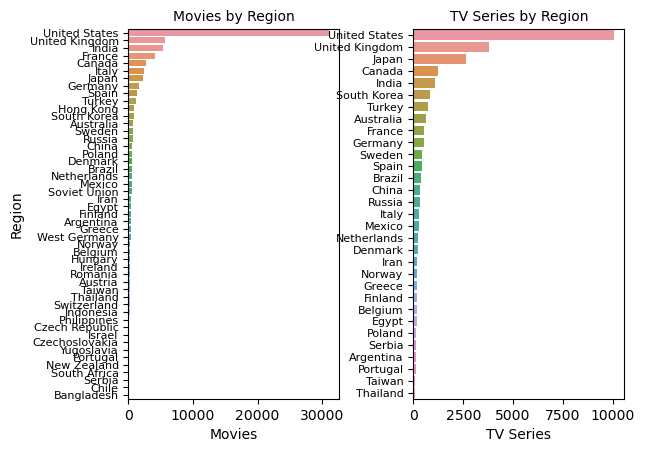

In [31]:
import seaborn as sns
region_df =df.groupby(['region','contentType'], as_index = False)['dataId'].count().sort_values('dataId', ascending = False)
region_df = region_df[(region_df['dataId'] >= 100) & (region_df['region'] != 'n')]

fig , (ax1, ax2) = plt.subplots(1,2)

# Left graph
sns.barplot(x = 'dataId', y = 'region', data = region_df[region_df['contentType']=='movie'], ax = ax1)
ax1.set_xlabel('Movies')
ax1.set_ylabel('Region')
ax1.set_title('Movies by Region', fontsize = 10)
ax1.tick_params(axis='y', labelsize=8)

# Right graph
sns.barplot(x = 'dataId', y = 'region', data = region_df[region_df['contentType']=='tvSeries'], ax = ax2)
ax2.set_xlabel('TV Series')
ax2.set_ylabel('')
ax2.set_title('TV Series by Region', fontsize = 10)
ax2.tick_params(axis='y', labelsize=8)

plt.subplots_adjust(wspace=0.35);


Here definitely say that UsA, Uk, Japan, Canada, India movies are most rated , you can say that population is one of the factors but UK has 20 times less population than India , though it has high ratings. So I am going to extract top 5 regional movies.

In [32]:
regions_of_interest = ["India", "United States", "United Kingdom", "Japan", "Canada"]
df_filtered1 = df_filtered[df_filtered["region"].isin(regions_of_interest)]

In [38]:
df_filtered1

,dataId,region,genre,contentType,title,length,releaseYear,votes,rating,description
0,102795,India,Drama,movie,Ratha Kanneer,154.0,1954,349,8.5,"The story revolves around Mohanasundaram, a re..."
59,102854,United Kingdom,Animation,movie,Internet Story,10.0,2010,349,8.1,A fast-paced and thought-provoking film told t...
71,102866,United States,Short,movie,And Then,17.0,2021,349,9.5,"Mana, a Japanese-American woman who arrives in..."
74,102869,United Kingdom,Documentary,movie,Demetri Martin: If I,50.0,-1,349,8.0,Demetri Martin presents his existential dread ...
102,102897,Japan,Animation,movie,The Day I Bought a Star,16.0,2006,348,8.2,A young boy is tired of the city and escapes i...
...,...,...,...,...,...,...,...,...,...,...
101594,491,United States,Drama,tvSeries,The Morning Show,60.0,2019,106546,8.2,An inside look at the lives of the people who ...
101595,492,United States,Comedy,tvSeries,Married... with Children,22.0,1987,106243,8.1,Al is the quintessential working class dad. Pe...
101596,493,United States,Crime,tvSeries,Sharp Objects,421.0,2018,105484,8.1,A reporter confronts the psychological demons ...
101601,498,United States,Action,tvSeries,Justified,44.0,2010,103427,8.6,U.S. Marshal Raylan Givens is reassigned from ...


In [42]:
#pip install textblob

In [43]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob

In [45]:
# nltk.download('stopwords')
# nltk.download('punkt')

In [46]:
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    text = word_tokenize(text)  # Tokenize text
    text = [word for word in text if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(text)

# Apply cleaning function
df_filtered1['clean_plot'] = df_filtered1['description'].dropna().apply(clean_text)

C:\Users\indub\AppData\Local\Temp\ipykernel_32628\2051427555.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
def get_polarity_scores(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply sentiment analysis
sentiment_scores = df_filtered1['clean_plot'].apply(lambda x: pd.Series(get_polarity_scores(x)))
df_filtered1[['polarity', 'subjectivity']] = sentiment_scores

C:\Users\indub\AppData\Local\Temp\ipykernel_32628\341608587.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\indub\AppData\Local\Temp\ipykernel_32628\341608587.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
features = df_filtered1[['length','votes','rating','polarity', 'subjectivity']].dropna()

C:\Users\indub\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\indub\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\indub\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\indub\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\indub\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_i

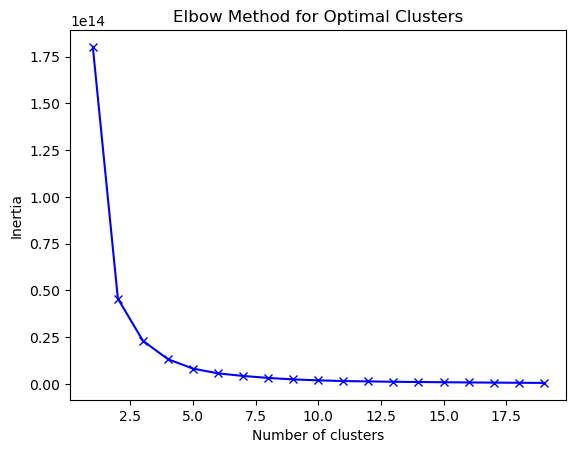

In [60]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 20)  # Adjust the range based on your data
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(features)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [65]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
df_filtered1['cluster'] = kmeans.fit_predict(features)

C:\Users\indub\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\indub\AppData\Local\Temp\ipykernel_32628\4145962962.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [73]:
#pip install wordcloud

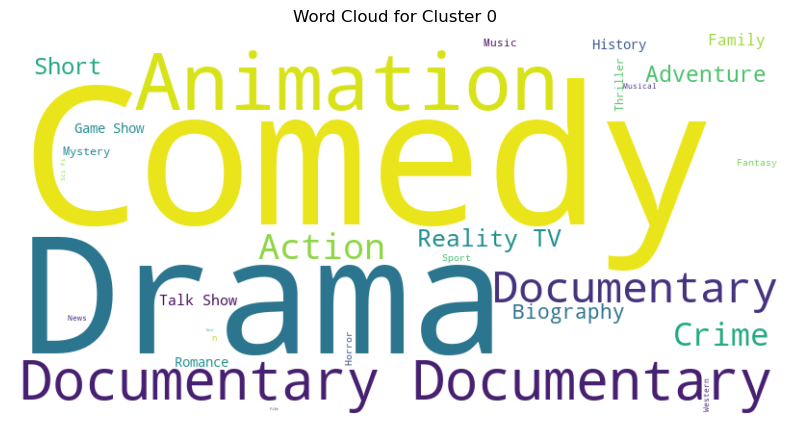

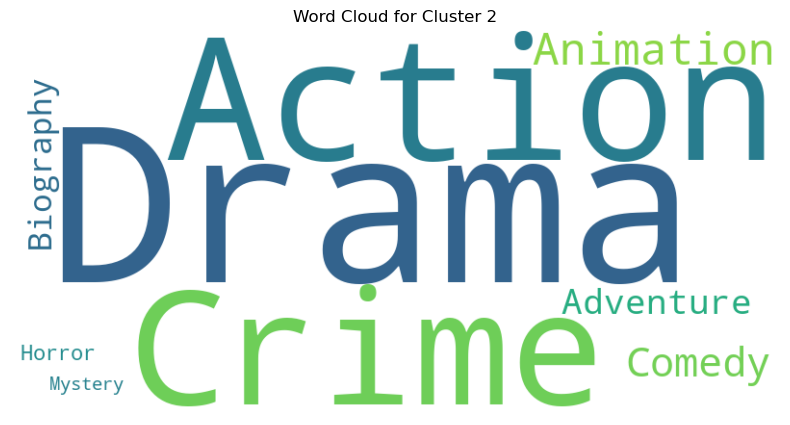

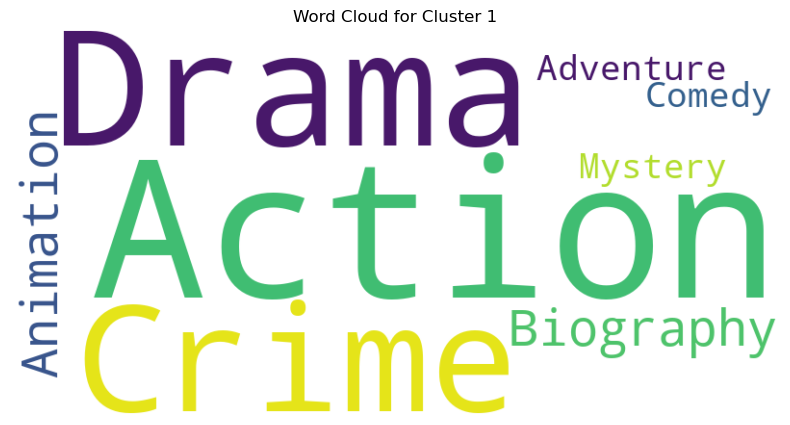

In [74]:
from wordcloud import WordCloud
def create_word_cloud(cluster_data, cluster_num):
    text = ' '.join(cluster_data['genre'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster_num}')
    plt.show()

# Create and display word clouds for each cluster
for cluster_num in df_filtered1['cluster'].unique():
    cluster_data = df_filtered1[df_filtered1['cluster'] == cluster_num]
    create_word_cloud(cluster_data, cluster_num)

In [75]:
cluster=df_filtered1.groupby(by=df_filtered1['cluster'])

In [76]:
df_filtered1=cluster.apply(lambda x: x.sort_values(["rating"],ascending=False))
df_filtered1.reset_index(level=0, inplace=True,drop=True)

In [78]:
df_filtered1.head()

,dataId,region,genre,contentType,title,length,releaseYear,votes,rating,description,clean_plot,polarity,subjectivity,cluster
32438,70363,India,Crime,movie,Ganaa,-1.0,2023,1119,10.0,Add a Plot\n,add plot,0.000000,0.000000,0
55893,46912,India,Drama,movie,Shubh Nikah,-1.0,2023,2767,10.0,Families of two different cultures join hands ...,families two different cultures join hands com...,0.311111,0.644444,0
74346,27955,India,Talk-Show,tvSeries,Desi Vibes with Shehnaaz Gill,-1.0,2022,459,9.9,"Presenting the first ever quirkiest show, whic...",presenting first ever quirkiest show made pure...,0.488095,0.377778,0
27004,75907,India,Thriller,movie,Beega,-1.0,2023,817,9.9,Add a Plot\n,add plot,0.000000,0.000000,0
59699,43824,United States,Drama,tvSeries,Steven Reeds Weber Cooks,5.0,2012,192,9.9,"Set in Paris, the plot follows a rat who dream...",set paris plot follows rat dreams becoming che...,-0.050000,0.583333,0


In [84]:
# Example usage:
recommended_movies = recommend_movies(2)
print(recommended_movies)

        dataId                       title
101378     275            Band of Brothers
101360     257                   Chernobyl
101396     293                    The Wire
101406     303  Avatar: The Last Airbender
101418     315                   Aspirants
101388     285                The Sopranos
101371     268              Rick and Morty
101358     255                    Sherlock
101399     296                  Death Note
101391     288             Attack on Titan


In [85]:
import pickle
file = open('dataset.pkl','wb')
pickle.dump(df_filtered1,file)

0-> sad/ fear /angry
1->neutral/disgust/lazy
2-happy/surprise/joy